In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# ignore imputation warnings from pymc
# ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
import warnings
from pymc import ImputationWarning

warnings.filterwarnings("ignore", category=ImputationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from birdcall_distribution.data import prepare_dataframe

prep_df, W = prepare_dataframe(
    "../data/ee_v3_western_us_2.parquet",
    "../data/raw/birdclef-2022/train_metadata.csv",
    n_species=3,
)
prep_df.head()

,primary_label,grid_id,y,region,grid_size,population_density,elevation_p5,elevation_p50,elevation_p95,LST_Day_1km_p5,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
adjacency_idx,,,,,,,,,,,,,,,,,,,,,
0,other,-103_37,9.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,normoc,-103_37,3.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,wesmea,-103_37,2.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,houfin,-103_37,NaN,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
1,normoc,-103_39,NaN,western_us,2,72311.465983,933.400010,1109.527419,1373.500000,23.530828,...,0,0,26593,1,11191,14,0,0,5,5


varying_intercept_model


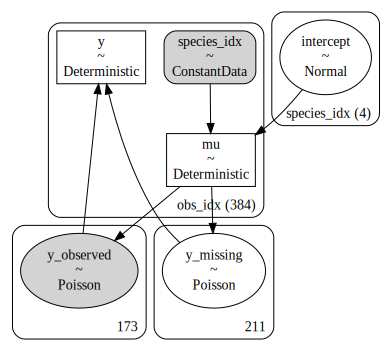

pooled_intercept_pooled_covariate_model


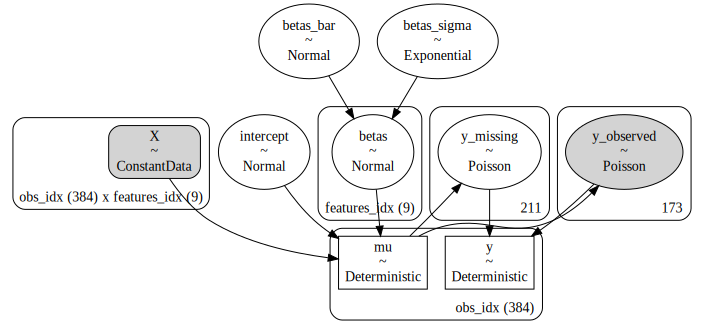

pooled_intercept_varying_covariate_model


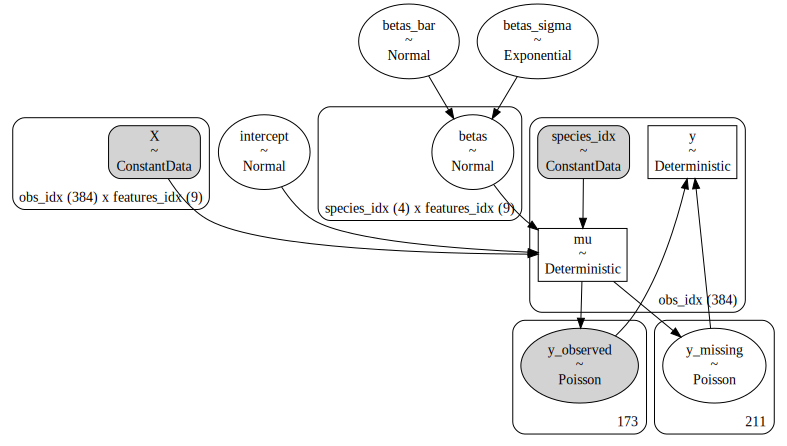

varying_intercept_pooled_covariate_model


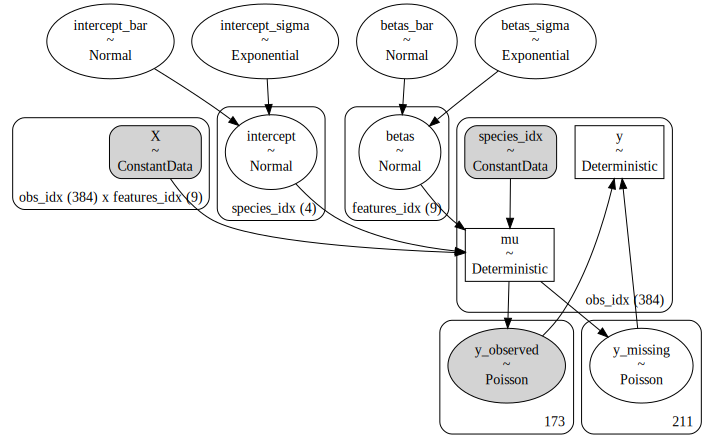

varying_intercept_varying_covariate_model


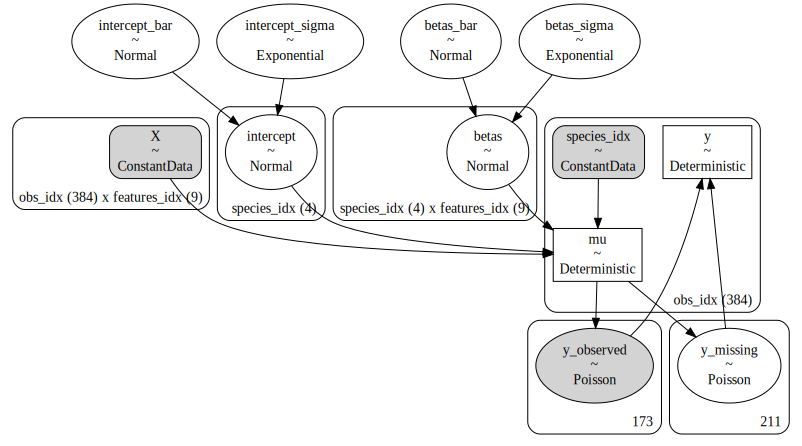

varying_intercept_car_model


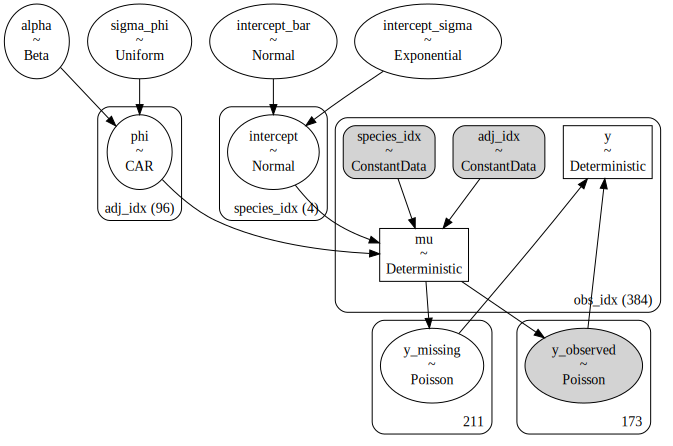

pooled_intercept_car_model


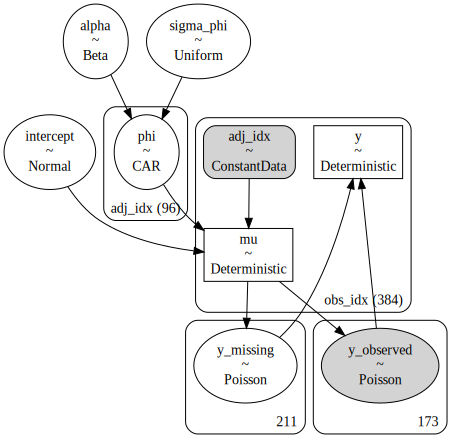

pooled_intercept_varying_covariate_car_model


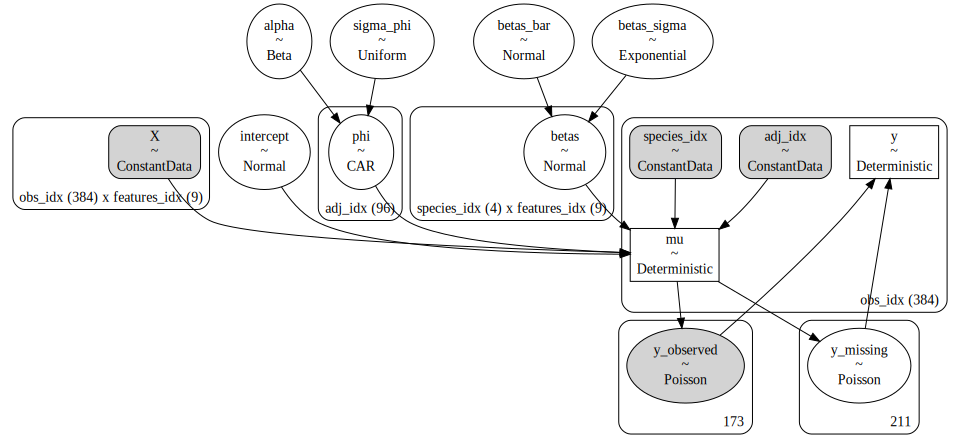

varying_intercept_pooled_covariate_car_model


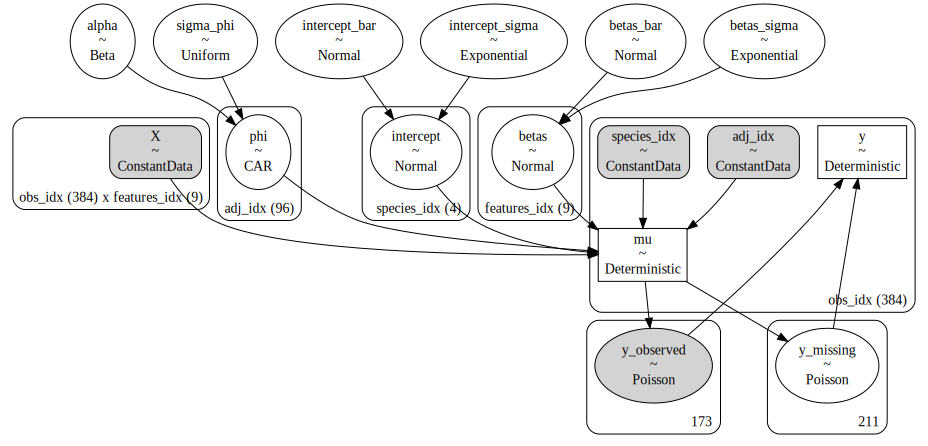

varying_intercept_varying_covariate_car_model


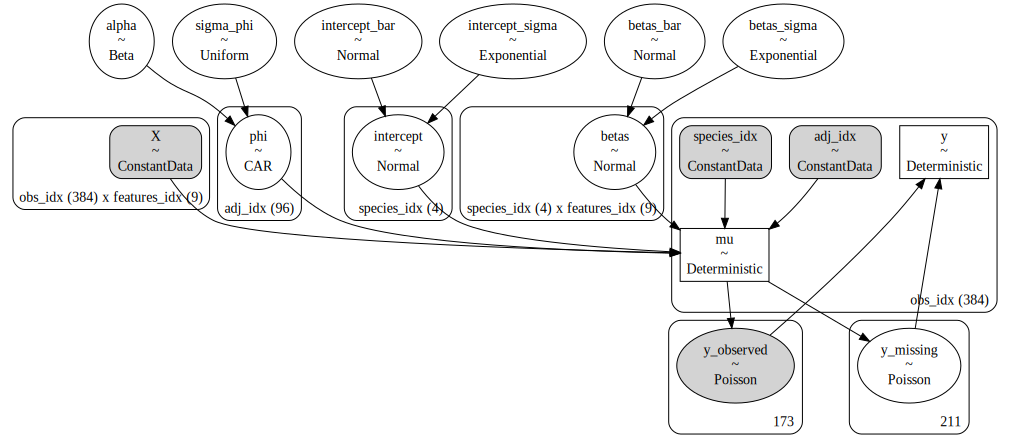

In [6]:
from birdcall_distribution import model
import pymc as pm
import arviz as az

# display function
from IPython.display import display

models = {
    "varying_intercept_model": model.make_varying_intercept_model,
    "pooled_intercept_pooled_covariate_model": model.make_pooled_intercept_pooled_covariate_model,
    "pooled_intercept_varying_covariate_model": model.make_pooled_intercept_varying_covariate_model,
    "varying_intercept_pooled_covariate_model": model.make_varying_intercept_pooled_covariate_model,
    "varying_intercept_varying_covariate_model": model.make_varying_intercept_varying_covariate_model,
    "varying_intercept_car_model": model.make_varying_intercept_car_model,
    "pooled_intercept_car_model": model.make_pooled_intercept_car_model,
    "pooled_intercept_varying_covariate_car_model": model.make_pooled_intercept_varying_covariate_car_model,
    "varying_intercept_pooled_covariate_car_model": model.make_varying_intercept_pooled_covariate_car_model,
    "varying_intercept_varying_covariate_car_model": model.make_varying_intercept_varying_covariate_car_model,
}

# test that all the models are dimensionally correct
for name, func in models.items():
    print(name)
    m = func(prep_df, W)
    # graphviz
    display(pm.model_to_graphviz(m))

In [7]:
# test that all the models can be sampled correctly
for name, func in models.items():
    print(name)
    model = func(prep_df, W)
    with model:
        trace = pm.sample(10, tune=0, cores=1, chains=1)

Only 10 samples in chain.


varying_intercept_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_pooled_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_varying_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


varying_intercept_pooled_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


varying_intercept_varying_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


varying_intercept_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_varying_covariate_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.
Only 10 samples in chain.


varying_intercept_pooled_covariate_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


varying_intercept_varying_covariate_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.


In [8]:
# now sample everything for real, and store the traces
traces = {}
for name, func in models.items():
    print(name)
    model = func(prep_df, W)
    with model:
        trace = pm.sample(2000, tune=1000, cores=8, target_accept=0.9)
    traces[name] = trace

varying_intercept_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 62 seconds.


pooled_intercept_pooled_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 81 seconds.


pooled_intercept_varying_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 92 seconds.


varying_intercept_pooled_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 90 seconds.


varying_intercept_varying_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 104 seconds.


varying_intercept_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 120 seconds.


pooled_intercept_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 110 seconds.


pooled_intercept_varying_covariate_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 277 seconds.


varying_intercept_pooled_covariate_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 242 seconds.


varying_intercept_varying_covariate_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept_bar, intercept_sigma, intercept, betas_bar, betas_sigma, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 218 seconds.


In [9]:
ranking = az.compare(traces, ic="waic", scale="deviance")
ranking

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
varying_intercept_varying_covariate_car_model,0,1071.559104,133.591299,0.000000,0.525533,47.564488,0.000000,True,deviance
varying_intercept_pooled_covariate_car_model,1,1296.159549,162.688628,224.600445,0.295046,129.663269,103.639845,True,deviance
varying_intercept_car_model,2,1304.504925,165.707754,232.945821,0.000000,132.935041,106.866874,True,deviance
pooled_intercept_varying_covariate_car_model,3,1547.369152,266.222783,475.810048,0.043670,96.627865,79.119442,True,deviance
varying_intercept_varying_covariate_model,4,2956.882363,483.697737,1885.323259,0.000000,448.524021,433.903424,True,deviance
varying_intercept_pooled_covariate_model,5,3002.594451,343.406094,1931.035347,0.118511,508.379798,492.011691,True,deviance
pooled_intercept_varying_covariate_model,6,3252.058426,537.337704,2180.499322,0.000000,467.439998,454.444104,True,deviance
pooled_intercept_car_model,7,3382.347242,632.289156,2310.788138,0.003710,429.001069,414.638435,True,deviance
varying_intercept_model,8,4027.621380,117.966377,2956.062276,0.002428,805.710540,796.464959,True,deviance
pooled_intercept_pooled_covariate_model,9,4327.899402,451.853914,3256.340298,0.011102,862.912532,853.266938,True,deviance


In [12]:
formatted = (
    ranking.iloc[:, :-2]
    .round(2)
    .rename(columns={"index": "model name"})
    .drop(columns=["weight"])
)
formatted

,rank,elpd_waic,p_waic,elpd_diff,se,dse
varying_intercept_varying_covariate_car_model,0,1071.56,133.59,0.00,47.56,0.00
varying_intercept_pooled_covariate_car_model,1,1296.16,162.69,224.60,129.66,103.64
varying_intercept_car_model,2,1304.50,165.71,232.95,132.94,106.87
pooled_intercept_varying_covariate_car_model,3,1547.37,266.22,475.81,96.63,79.12
varying_intercept_varying_covariate_model,4,2956.88,483.70,1885.32,448.52,433.90
varying_intercept_pooled_covariate_model,5,3002.59,343.41,1931.04,508.38,492.01
pooled_intercept_varying_covariate_model,6,3252.06,537.34,2180.50,467.44,454.44
pooled_intercept_car_model,7,3382.35,632.29,2310.79,429.00,414.64
varying_intercept_model,8,4027.62,117.97,2956.06,805.71,796.46
pooled_intercept_pooled_covariate_model,9,4327.90,451.85,3256.34,862.91,853.27


In [14]:
print(formatted.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  rank &  elpd\_waic &  p\_waic &  elpd\_diff &      se &     dse \\
\midrule
varying\_intercept\_varying\_covariate\_car\_model &     0 &    1071.56 &  133.59 &       0.00 &   47.56 &    0.00 \\
varying\_intercept\_pooled\_covariate\_car\_model  &     1 &    1296.16 &  162.69 &     224.60 &  129.66 &  103.64 \\
varying\_intercept\_car\_model                   &     2 &    1304.50 &  165.71 &     232.95 &  132.94 &  106.87 \\
pooled\_intercept\_varying\_covariate\_car\_model  &     3 &    1547.37 &  266.22 &     475.81 &   96.63 &   79.12 \\
varying\_intercept\_varying\_covariate\_model     &     4 &    2956.88 &  483.70 &    1885.32 &  448.52 &  433.90 \\
varying\_intercept\_pooled\_covariate\_model      &     5 &    3002.59 &  343.41 &    1931.04 &  508.38 &  492.01 \\
pooled\_intercept\_varying\_covariate\_model      &     6 &    3252.06 &  537.34 &    2180.50 &  467.44 &  454.44 \\
pooled\_intercept\_car\_model                    &     7 &    3

C:\Users\acmiy\AppData\Local\Temp\ipykernel_40060\2487536844.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(formatted.to_latex())
